# EDA

In [117]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# import user-defined functions
from data.load import load_data

# remove warnings
warnings.filterwarnings("ignore")

In [157]:
df = load_data(preprocessed=True)

### t-Test for Age and Attrition

In [121]:
# hypothesis testing for the means of ages of Attrition and Non-Attrition using t-test

from scipy.stats import ttest_ind

attrition = df[df['Attrition'] == 1]['Age']
non_attrition = df[df['Attrition'] == 0]['Age']

ttest_ind(attrition, non_attrition)

# print the p-value
print(ttest_ind(attrition, non_attrition).pvalue)

1.9968016158894556e-26


Since the $p$-value is less than 0.05, we can reject the null hypothesis that the average age of employees who left the company is the same as the average age of employees who stayed in the company. In other words, this might indicate there is a significant difference in the average age of employees who left the company and those who stayed in the company.

### t-SNE

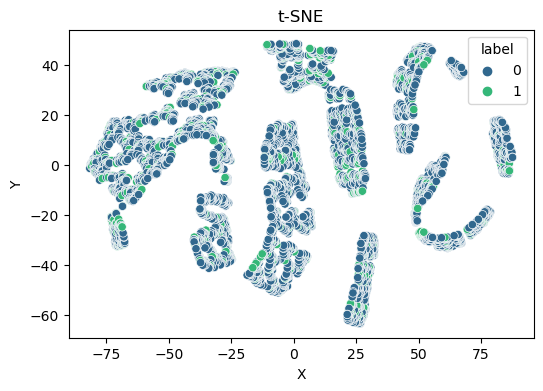

In [122]:
from models.visualization import plot_tsne
from data.preprocessing import one_hot_encode

df = load_data(preprocessed=True)

one_hot_cols = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
df = one_hot_encode(df, one_hot_cols, drop_first=False)

X = df.drop('Attrition', axis=1)
y = df['Attrition']

plot_tsne(X, y)